In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np

from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importando a base de dados (antes de reduzí-lo à 5 características):
base = pd.read_csv(r'exames-tratado-3.csv', index_col=0)
base.head()

,id,diagnostico,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,842302,M,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Dividindo dados em input e output
x = base.loc[:,'exame_2':].copy()
y = base['diagnostico']

alt_dict = {
    'B': 0,
    'M': 1
}
y_binario = [alt_dict[x] for x in y]

In [9]:
# Definindo a seed
SEED = 30

In [8]:
np.random.seed(SEED)

# Dividindo dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y_binario, test_size=0.3)

# Criando o classificador
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

# Criando o selecionador de características
selector = RFECV(estimator=rfc, cv=5, step = 1, scoring = 'recall')
selector.fit(x_train, y_train)

# Verificando as características selecionadas
selector.get_feature_names_out()

array(['exame_2', 'exame_5', 'exame_7', 'exame_8', 'exame_9', 'exame_12',
       'exame_14', 'exame_15', 'exame_16', 'exame_18', 'exame_23',
       'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31'], dtype=object)

Acurácia: 96.49%
Precisão: 98.28%
Recall: 91.94%


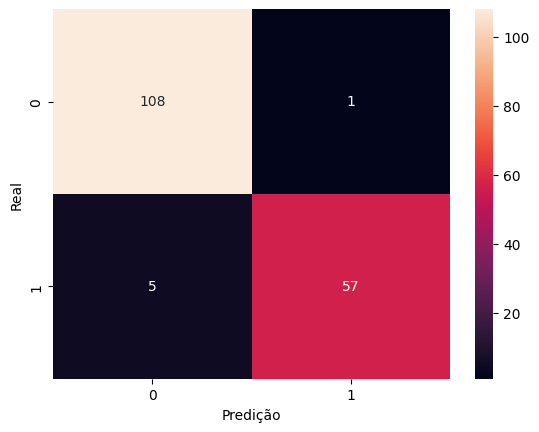

In [12]:
# Testando um modelo utilizando apenas as características filtradas:

np.random.seed(SEED)

# Dividindo dados em treino e teste
x_train2, x_test2, y_train2, y_test2 = train_test_split(x[list(selector.get_feature_names_out())], y_binario, test_size=0.3)

# Criando o classificador
rfc2 = RandomForestClassifier(n_estimators=100)
rfc2.fit(x_train2, y_train2)

# Realizando a previsão
previsao = rfc2.predict(x_test2)

# Calculando as métricas para esse modelo:
acuracia = accuracy_score(y_test2, previsao)*100
precisao = precision_score(y_test2, previsao)*100
recall = recall_score(y_test2, previsao)*100
matriz_confusao = confusion_matrix(y_test2, previsao)

print(f'Acurácia: {acuracia:.2f}%')
print(f'Precisão: {precisao:.2f}%')
print(f'Recall: {recall:.2f}%')

sns.heatmap(matriz_confusao, annot = True, fmt='d').set(xlabel = 'Predição', ylabel = 'Real')
plt.show()

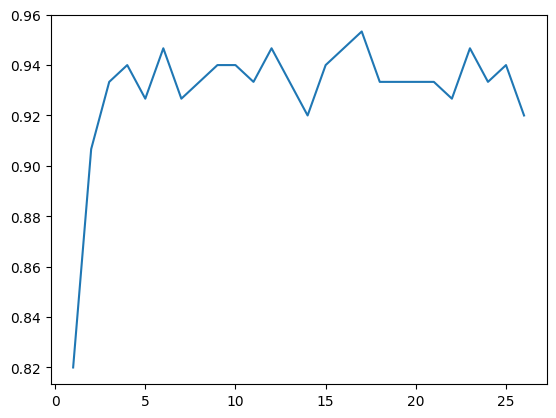

In [17]:
# Verificando o valor de recall para diferentes quantidades de características (valor médio das diversas partições realizadas pelo algoritmo, não o valor final do modelo)

sns.lineplot(x = range(1, len(selector.cv_results_['mean_test_score']) + 1), y = selector.cv_results_['mean_test_score'])

plt.show()
